### Oklahoma purchase credit card transactions project

The Office of Management and Enterprise Services in the State of Oklahoma has made its purchase credit card transactions available. This dataset contains information on purchases made through the purchase card programs administered by the state and higher education institutions.

# Table of Contents
- <b>[Section 1 Data Preparation](#1)</b>
  - [1.1 Create Data Fields](#11)
- <b>[Section 2 Initial observations](#2)</b>
- <b>[Section 3 Feature Engineering](#3)</b>
  - [3.1 Feature 1: The ratio to average amount](#31)
  - [3.2 Feature 2: The ratio to median amount](#32)
  - [3.3 Feature 3: The ratio to the average amount in month](#33)
  - [3.4 Feature 4: The ratio to median amount in month](#34)
  - [3.5 Feature 5: The ratio to average weekday amount in past 3 months](#35)
  - [3.6 Feature 6: The ratio to median weekday amount in past 3 months](#36)
  - [3.7 Feature 7: The total number of transactions with same vendor in past 30 days](#37)
  - [3.8 Feature 8: Total number of transactions on the same day in past 30 days](#38)
  - [3.9 Feature 9: The ratio to the average amount in weeks](#39)
  - [3.10 Feature 10: The ratio to average amount per day](#310)
  - [3.11 Feature 11: The ratio to average amount by vendor in past 3 months](#311)
  - [3.12 Feature 12: The ratio to median amount by vendor](#312)
  - [3.13 Feature 13: The average amount spent on the same weekday by vendor in past 30 days](#313)
  - [3.14 Feature 14: The average amount spent in months by vendor in past 30 days](#314)
  - [3.15 Feature 15: The ratio to average amount in each day by vendor](#315)<p>&nbsp;</p>
  
## Section 1 Data Preparation <a class="anchor" id="1"></a>

In [1]:
import pandas as pd
path = "C:/Users/Administrator/Desktop/CU/CU_SM2022/APANPS5420_001_2022_2-ANOMALYDETECTION/2/"
df = pd.read_csv(path + 'data-purchase-card-pcard-fiscal-year-2014.csv') #, encoding = "ISO-8859-1")    
df.head(5)

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [2]:
# check dimensions of the dataset, we found it has 442,458 rows and 11 columns 
print(df.shape)
print(df.columns) # check column names
df.describe() # Get the Simple Summary Statistics 

(442458, 11)
Index(['Year-Month', 'Agency Number', 'Agency Name', 'Cardholder Last Name',
       'Cardholder First Initial', 'Description', 'Amount', 'Vendor',
       'Transaction Date', 'Posted Date', 'Merchant Category Code (MCC)'],
      dtype='object')


,Year-Month,Agency Number,Amount
count,442458.000000,442458.000000,4.424580e+05
mean,201357.284375,42785.860353,4.249912e+02
std,47.107417,33378.461293,5.266509e+03
min,201307.000000,1000.000000,-4.286304e+04
25%,201309.000000,1000.000000,3.091000e+01
50%,201401.000000,47700.000000,1.048900e+02
75%,201404.000000,76000.000000,3.450000e+02
max,201406.000000,98000.000000,1.903858e+06


In [3]:
# change column names 
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

### Create date fields <a class="anchor" id="11"></a>

In [4]:
#Creating separate Year and Month columns for future feature engineering
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

## Section 2 Initial observations <a class="anchor" id="obs"></a>

From the graph below, we can see University of OKLAHOMA has the most transactions, followed by Univ. of Okla health science center

<AxesSubplot:xlabel='Count', ylabel='Agency_Name'>

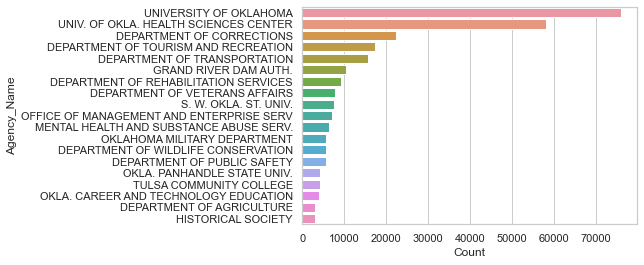

In [5]:
import numpy as np
import plotly
import pandas as pd
import plotly.express as px

# Summarize the count statistics by agency_name in df_count
df_count = df['Agency_Name'].value_counts()
df_count = pd.DataFrame(df_count).reset_index()
df_count.columns = ['Agency_Name','Count']

fig = px.bar(df_count, x='Agency_Name', y='Count', color = 'Agency_Name', width=1000, height=400)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="Agency_Name", x="Count", data=df_count[1:20])

## Section 3 Feature Engineering <a class="anchor" id="3"></a>

#### Instructions:
- Understand the data grain: each row is a cardholder (last name + first name)
- An agency can have multiple cardholders. A corporate card (agency_name) can be used by many cardholders and these cardholders have to follow the corporation policy.
- Intuition: One or two cardholders may abuse their corporate cards. If we compare a cardholder to his agency, we can find outliers.
- The spending for a merchant category can be higher than others. It does not make sense to compare the spending of a merchant category to another. An agency can spend on various merchant categories, and you cannot claim anomalies just because the spending on one merchant category is higher than another.
- Anomaly detection is about "comparing a transaction to a benchmark". What is the right benchmark? 
- So we will aggregate to the Aggrecy_Name level and card holder level then build features.
- Common sense tells us the comparison should be at "Agency_Name" and "Merchant_Category" level.

### Feature 1: The ratio to average amount <a class="anchor" id="31"></a>

#### My thought process:
- The ratio to average amount is a good feature since cardholders who share the agency name and merchant category are more likely to similar level of purchase. If the ratio to average amount of cardholders way above the average, we should check if it is anomolies.

In [7]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
type(stat_by_agency)
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency_Name                     Merchant_Category                                     
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED  115.120000
                                CATALOG MERCHANTS                           -53.344286
                                COMPUTER NETWORK/INFORMATION SERVICES        18.340000
                                DRUG STORES AND PHARMACIES                  153.450000
                                GROCERY STORES,AND SUPERMARKETS              74.525455
...                                                                                ...
`DEPARTMENT OF EDUCATION        TELECOMMUNICATION SERVICES                  118.054000
                                TRAVEL AGENCIES                              24.253731
                                TROPICANA RESORT AND CASINO                 481.600000
                                UNITED AIRLINES                             310.547368
                                WYNDHAM HOTELS                               93.282857

[8427 rows x 1 columns]

In [8]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['agency_merchant_avg_ratio_amount'] = np.where(df1['AVG_amount']==0, 0, df1['Amount'] / df1['AVG_amount'])
df1['agency_merchant_avg_ratio_amount'].describe()

count    442458.000000
mean          0.999724
std           7.225363
min       -2735.680000
25%           0.177145
50%           0.515301
75%           1.102916
max        2735.680000
Name: agency_merchant_avg_ratio_amount, dtype: float64

#### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- If the transactions are 2 times of the average, it should not be anomalies since we can see from above description that standard deviation is high. Furthermore, we can plot to see the distribution as below which also indicates that 2 times of the average should not be identified as anomalies.

In [141]:
# cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut(df1[var], percentile)
df1[['agency_merchant_avg_ratio_amount_D']]

,agency_merchant_avg_ratio_amount_D
0,"(1.298, 3.515]"
1,"(0.515, 1.298]"
2,"(0.133, 0.515]"
3,"(1.298, 3.515]"
4,"(0.133, 0.515]"
...,...
442453,"(0.515, 1.298]"
442454,"(0.133, 0.515]"
442455,"(0.0212, 0.133]"
442456,"(8.71, 2735.68]"


<AxesSubplot:xlabel='agency_merchant_avg_ratio_amount_D', ylabel='count'>

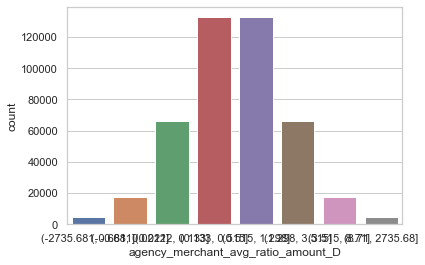

In [142]:
sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df1)

#### Thought process:
- It will be ideal if the x label does not overlap with each other.
- Try to rotate it.

[Text(0, 0, '(-2735.681, -0.681]'),
 Text(1, 0, '(-0.681, 0.0212]'),
 Text(2, 0, '(0.0212, 0.133]'),
 Text(3, 0, '(0.133, 0.515]'),
 Text(4, 0, '(0.515, 1.298]'),
 Text(5, 0, '(1.298, 3.515]'),
 Text(6, 0, '(3.515, 8.71]'),
 Text(7, 0, '(8.71, 2735.68]')]

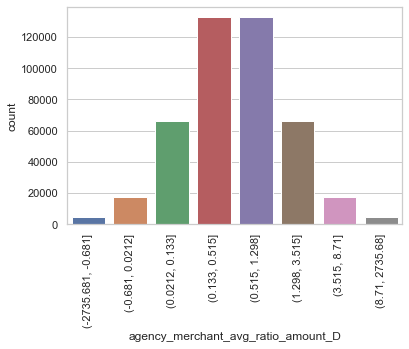

In [143]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- Now we have identified extreme spending compared to the same merchant category. 
- Take a look of them.

In [155]:
df1[df1['agency_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_avg_ratio_amount,agency_merchant_avg_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,427.634060,2.081219,"(1.298, 3.515]"
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,170.060436,14.259636,"(8.71, 2735.68]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.00,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,392.641168,9.122833,"(8.71, 2735.68]"
35,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,GODSEY,R,GENERAL PURCHASE,407.85,OPTIMUM ENERGY PROD,2013-07-26,2013-07-29,HARDWARE STORES,2013,7,30,Friday,170.060436,2.398265,"(1.298, 3.515]"


### Feature 2: The ratio to the median amount <a class="anchor" id="32"></a>
- Notice the only difference to the above code is "median".

#### My thought process:
- The ratio to median amount is a good feature since cardholders who share the agency name and merchant category are more likely to similar level of purchase. Median is also crucial because average can be highly influenced by a small portion of extreme high or low value. If the ratio to median amount of cardholders way above the median, we should check if it is anomolies.

In [9]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']

In [10]:
# add the new feature average spending to the dataset 
df2 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df2['agency_merchant_median_ratio_amount'] = np.where(df2['Median_amount']==0,0, df2['Amount'] / df2['Median_amount'])
df2['agency_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          4.952685
std        1078.581350
min       -1003.176471
25%           0.466090
50%           1.000000
75%           2.121102
max      528116.052705
Name: agency_merchant_median_ratio_amount, dtype: float64

In [11]:
# cut by percentile for plotting
var = 'agency_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var],percentile)

[Text(0, 0, '(-1003.177, -1.121]'),
 Text(1, 0, '(-1.121, 0.0653]'),
 Text(2, 0, '(0.0653, 0.362]'),
 Text(3, 0, '(0.362, 1.0]'),
 Text(4, 0, '(1.0, 2.691]'),
 Text(5, 0, '(2.691, 9.283]'),
 Text(6, 0, '(9.283, 28.085]'),
 Text(7, 0, '(28.085, 528116.053]')]

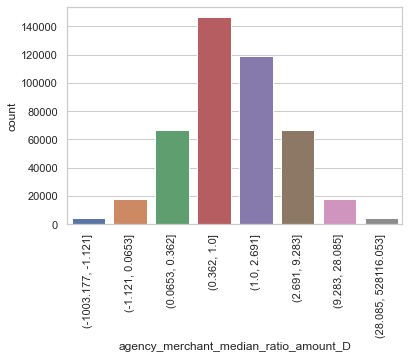

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_median_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [13]:
df2[df2['agency_merchant_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_median_ratio_amount,agency_merchant_median_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,250.000,3.560000,"(2.691, 9.283]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,32.485,2.967216,"(2.691, 9.283]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,181.940,2.167088,"(1.0, 2.691]"
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,31,Tuesday,187.000,3.060267,"(2.691, 9.283]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,91.500,4.863388,"(2.691, 9.283]"


##### Questions for you:
- You have created two features. Can you create more? How about by agency + merchant category + month?
- You have features in df1, df2, df3, etc. Can you merge the features into one data frame so in the future you can do modeling?

### Feature 3: The ratio to the average amount in months<a class="anchor" id="33"></a>

#### My thought process:
- The ratio to average amount in month is a good feature since cardholders who share the agency name and merchant category are more likely to similar level of purchase in month. Other than agency name and merchant category, month is also significant because people might spend more or less during certain months, for exmpale, cardholders from university might spend more during summer or winter vacation. If the ratio to average amount of cardholders in month way above the average, we should check if it is anomolies.

In [164]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].mean()
type(stat_by_agency)
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount_month']
stat_by_agency

AVG_amount_month
Agency_Name                     Merchant_Category                          Month                  
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11           115.120000
                                CATALOG MERCHANTS                          7           -637.750000
                                                                           8            669.080000
                                                                           9           -334.540000
                                                                           10           334.540000
...                                                                                            ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9            260.450000
                                                                           10           523.800000
                                                                           12           199.633333
                                WYNDHAM HOTELS                             1              0.000000
                                                                           12           130.596000

[39888 rows x 1 columns]

In [165]:
# add the new feature average spending to the dataset 
df3 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df3['agency_merchant_month_avg_ratio_amount'] = np.where(df3['AVG_amount_month']==0,0, df3['Amount'] / df3['AVG_amount_month'])
df3['agency_merchant_month_avg_ratio_amount'].describe()

count    4.970042e+06
mean     7.875569e+09
std      2.499405e+13
min     -2.447706e+16
25%      1.784404e-01
50%      5.285945e-01
75%      1.169469e+00
max      3.914191e+16
Name: agency_merchant_month_avg_ratio_amount, dtype: float64

In [167]:
# cut by percentile for plotting
var = 'agency_merchant_month_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var], percentile)
df3[['agency_merchant_month_avg_ratio_amount_D']]

,agency_merchant_month_avg_ratio_amount_D
0,"(1.431, 4.444]"
1,"(1.431, 4.444]"
2,"(1.431, 4.444]"
3,"(1.431, 4.444]"
4,"(1.431, 4.444]"
...,...
4970037,"(4.444, 13.051]"
4970038,"(4.444, 13.051]"
4970039,"(1.431, 4.444]"
4970040,"(4.444, 13.051]"


[Text(0, 0, '(-2.4477063974758644e+16, -0.82]'),
 Text(1, 0, '(-0.82, 0.0199]'),
 Text(2, 0, '(0.0199, 0.133]'),
 Text(3, 0, '(0.133, 0.529]'),
 Text(4, 0, '(0.529, 1.431]'),
 Text(5, 0, '(1.431, 4.444]'),
 Text(6, 0, '(4.444, 13.051]'),
 Text(7, 0, '(13.051, 3.914191026138382e+16]')]

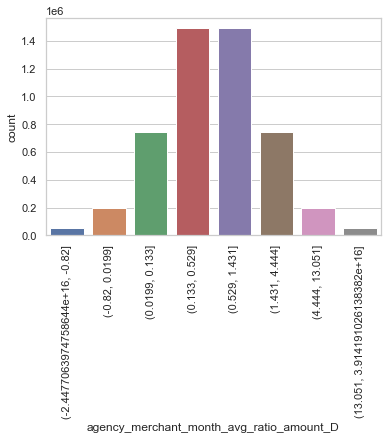

In [169]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_month_avg_ratio_amount_D", data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [171]:
df3[df3['agency_merchant_month_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount_month,agency_merchant_month_avg_ratio_amount,agency_merchant_month_avg_ratio_amount_D
2,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,335.938571,2.649294,"(1.431, 4.444]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,358.792458,2.480543,"(1.431, 4.444]"
4,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,379.849884,2.343031,"(1.431, 4.444]"
8,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,346.796632,2.566346,"(1.431, 4.444]"
10,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.0,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,297.304154,2.993567,"(1.431, 4.444]"


### Feature 4: The ratio to the median amount in months<a class="anchor" id="34"></a>
- Notice the only difference to the above code is "median".

#### My thought process:
- The ratio to median amount in month is a good feature since cardholders who share the agency name and merchant category are more likely to similar level of purchase in month. Median is also crucial because average can be highly influenced by a small portion of extreme high or low value. Other than agency name and merchant category, month is also significant because people might spend more or less during certain months, for exmpale, cardholders from university might spend more during summer or winter vacation. If the ratio to median amount of cardholders way above the median, we should check if it is anomolies

In [109]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount_monthly']
stat_by_agency

Median_amount_monthly
Agency_Name                     Merchant_Category                          Month                       
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 11                    115.12
                                CATALOG MERCHANTS                          7                    -637.75
                                                                           8                     669.08
                                                                           9                    -334.54
                                                                           10                    334.54
...                                                                                                 ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            9                     510.60
                                                                           10                    523.80
                                                                           12                    181.80
                                WYNDHAM HOTELS                             1                       0.00
                                                                           12                     87.00

[39888 rows x 1 columns]

In [114]:
# add the new feature median spending to the dataset 
df4 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Month'])
# Feature 4: ratio of amount spending and median spending by merchant category 
df4
df4['agency_merchant_month_median_ratio_amount'] = np.where(df4['Median_amount_monthly']==0,0, df4['Amount'] / df4['Median_amount_monthly'])
df4['agency_merchant_month_median_ratio_amount'].describe()

count    442458.000000
mean          5.010047
std        1195.766096
min      -29642.000000
25%           0.500000
50%           1.000000
75%           1.912717
max      598420.505983
Name: agency_merchant_month_median_ratio_amount, dtype: float64

In [116]:
# cut by percentile for plotting
var = 'agency_merchant_month_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var],percentile)

[Text(0, 0, '(-29642.001, -1.103]'),
 Text(1, 0, '(-1.103, 0.0687]'),
 Text(2, 0, '(0.0687, 0.389]'),
 Text(3, 0, '(0.389, 1.0]'),
 Text(4, 0, '(1.0, 2.425]'),
 Text(5, 0, '(2.425, 8.71]'),
 Text(6, 0, '(8.71, 27.182]'),
 Text(7, 0, '(27.182, 598420.506]')]

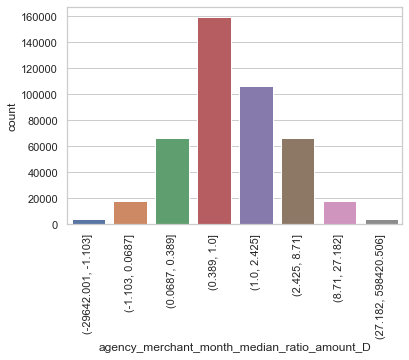

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_month_median_ratio_amount_D", data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [172]:
df4[df4['agency_merchant_month_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount_monthly,agency_merchant_month_median_ratio_amount,agency_merchant_month_median_ratio_amount_D
0,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,2013,7,31,Tuesday,365.000,2.438356,"(2.425, 8.71]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,30.605,3.149485,"(2.425, 8.71]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,174.500,2.259484,"(1.0, 2.425]"
10,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McGowin,R,GENERAL PURCHASE,278.23,RANDY'S FOODS,2013-07-29,2013-07-31,FREEZER AND LOCKER MEAT PROVISIONERS,2013,7,31,Monday,112.700,2.468767,"(2.425, 8.71]"
12,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McLemore,A,GENERAL PURCHASE,572.27,GIDDINGS MACHINE CO.,2013-07-30,2013-07-31,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,31,Tuesday,205.465,2.785243,"(2.425, 8.71]"


### Feature 5: The ratio to average weekday amount in past 3 months<a class="anchor" id="35"></a>

#### My thought process:
- The ratio to average weekday amount in past 3 months is a good feature since it further narrow down the scope in latest 3 months rather than taking all the observations which might be biased, for example, inflation. Other than agency name and merchant category, weekday is also significant because people might spend more or less during certain months, for exmpale, cardholders from university might spend more in weekend. If the ratio to average weekday amount in past 3 months of cardholders way above the average, we should check if it is anomolies.

In [14]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(months=3)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
266197,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Kindred,A,GENERAL PURCHASE,-0.36,FACEBK PGWZW5ASF2,2014-03-31,2014-03-31,ADVERTISING SERVICES,2014,3,14,Monday
267230,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Chang,Y,Dell D5000 Wireless Dock PCE,215.99,DMI DELL HIGHER EDUC,2014-03-31,2014-03-31,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",2014,3,14,Monday
268533,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Perez,S,Once Upon a Time in the We PCE|The Bridges of ...,51.28,AMAZON MKTPLACE PMTS,2014-03-31,2014-03-31,BOOK STORES,2014,3,14,Monday
274102,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,GENERAL PURCHASE,39.10,EARTHGRAINS A/R,2014-04-25,2014-04-28,MISCELLANEOUS GENERAL MERCHANDISE,2014,4,17,Friday
274103,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,COKE INV bo,973.12,GRT PLAINS COCA COLA,2014-04-24,2014-04-28,NON-DURABLE GOODS NOT ELSEWHERE CLASSIFIED,2014,4,17,Thursday


In [15]:
# create average spending group by agency and merchant category 
stat_by_agency = df_sub.groupby(['Agency_Name', 'Merchant_Category', 'Day_of_Week'])['Amount'].mean()
type(stat_by_agency)
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency_Name                     Merchant_Category                               Day_of_Week             
ATTORNEY GENERAL                ADVERTISING SERVICES                            Wednesday    1040.000000
                                AMERICAN AIRLINES                               Friday        446.500000
                                                                                Monday        405.242500
                                                                                Thursday      581.000000
                                                                                Tuesday       512.857143
...                                                                                                  ...
WILL ROGERS MEMORIAL COMMISSION DURABLE GOODS, NOT ELSEWHERE CLASSIFIED         Wednesday      40.000000
                                EATING PLACES AND RESTAURANTS                   Friday        494.000000
                                EMPLOYMENT AGENCIES AND TEMPORARY HELP SERVICES Friday        250.000000
                                MISCELLANEOUS PUBLISHING AND PRINTING SERVICES  Wednesday      55.290000
                                POSTAGE STAMPS                                  Tuesday        51.000000

[14870 rows x 1 columns]

In [361]:
# add the new feature average spending to the dataset 
df5 = pd.merge(df_sub, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Day_of_Week'])
# Feature 5: ratio of amount spending and avergae spending by merchant category 
df5['agency_merchant_weekday_avg_ratio_amount'] = np.where(df5['AVG_amount']==0, 0, df5['Amount'] / df5['AVG_amount'])
df5['agency_merchant_weekday_avg_ratio_amount'].describe()

count    1.137580e+05
mean     9.732478e-01
std      6.096827e+15
min     -5.875565e+17
25%      2.195591e-01
50%      6.587792e-01
75%      1.123065e+00
max      5.875565e+17
Name: agency_merchant_weekday_avg_ratio_amount, dtype: float64

#### My thought process:
- The above percentile motivates me to cut by percentile for plotting
- Do you notice some transactions can be 2 times of the average. Could they be anomalies?

In [362]:
# cut by percentile for plotting
var = 'agency_merchant_weekday_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var],percentile)
df5[['agency_merchant_weekday_avg_ratio_amount_D']]

,agency_merchant_weekday_avg_ratio_amount_D
0,"(-0.756, 0.0261]"
1,"(0.163, 0.659]"
2,"(0.163, 0.659]"
3,"(0.0261, 0.163]"
4,"(3.373, 7.906]"
...,...
113753,"(1.339, 3.373]"
113754,"(0.163, 0.659]"
113755,"(0.163, 0.659]"
113756,"(7.906, 5.875564958853576e+17]"


[Text(0, 0, '(-5.875564958853576e+17, -0.756]'),
 Text(1, 0, '(-0.756, 0.0261]'),
 Text(2, 0, '(0.0261, 0.163]'),
 Text(3, 0, '(0.163, 0.659]'),
 Text(4, 0, '(0.659, 1.339]'),
 Text(5, 0, '(1.339, 3.373]'),
 Text(6, 0, '(3.373, 7.906]'),
 Text(7, 0, '(7.906, 5.875564958853576e+17]')]

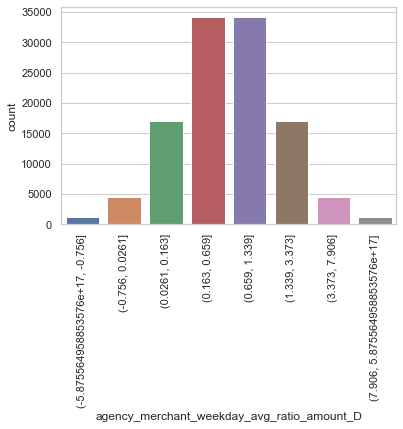

In [363]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_weekday_avg_ratio_amount_D", data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#### Thought process:
- Now we have identified extreme spending compared to the same merchant category. 
- Take a look of them.

In [364]:
df5[df5['agency_merchant_weekday_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_weekday_avg_ratio_amount,agency_merchant_weekday_avg_ratio_amount_D
4,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,COKE INV bo,973.12,GRT PLAINS COCA COLA,2014-04-24,2014-04-28,NON-DURABLE GOODS NOT ELSEWHERE CLASSIFIED,2014,4,17,Thursday,263.054091,3.699315,"(3.373, 7.906]"
10,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Hunt,C,Acer H236HL bid 23-Inch Wi PCE,330.96,AMAZON MKTPLACE PMTS,2014-04-25,2014-04-28,BOOK STORES,2014,4,17,Friday,118.036423,2.803880,"(1.339, 3.373]"
15,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Ishmael,S,GENERAL PURCHASE,1292.11,www.wiley.com,2014-04-25,2014-04-28,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2014,4,17,Friday,389.721039,3.315474,"(1.339, 3.373]"
19,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Jacobs,D,GENERAL PURCHASE,1342.00,WTC TA INSTRUMENTS,2014-04-25,2014-04-28,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2014,4,17,Friday,646.194741,2.076773,"(1.339, 3.373]"
24,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Jin,X,Stanley 33-425 Powerlock 2 PCE|Empire Level 12...,426.30,AMAZON MKTPLACE PMTS,2014-04-27,2014-04-28,BOOK STORES,2014,4,17,Sunday,163.413542,2.608719,"(1.339, 3.373]"


### Feature 6: The ratio to the weekday median amount in past 3 months<a class="anchor" id="36"></a>
- Notice the only difference to the above code is "median".

#### My thought process:
- The ratio to median weekday amount in past 3 months is a good feature since it further narrow down the scope in latest 3 months rather than taking all the observations which might be biased, for example, inflation. Median is also crucial because average can be highly influenced by a small portion of extreme high or low value. Other than agency name and merchant category, weekday is also significant because people might spend more or less during certain months, for exmpale, cardholders from university might spend more in weekend. If the ratio to median weekday amount in past 3 months of cardholders way above the median, we should check if it is anomolies.

In [16]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(months=3)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
266197,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Kindred,A,GENERAL PURCHASE,-0.36,FACEBK PGWZW5ASF2,2014-03-31,2014-03-31,ADVERTISING SERVICES,2014,3,14,Monday
267230,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Chang,Y,Dell D5000 Wireless Dock PCE,215.99,DMI DELL HIGHER EDUC,2014-03-31,2014-03-31,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",2014,3,14,Monday
268533,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Perez,S,Once Upon a Time in the We PCE|The Bridges of ...,51.28,AMAZON MKTPLACE PMTS,2014-03-31,2014-03-31,BOOK STORES,2014,3,14,Monday
274102,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,GENERAL PURCHASE,39.10,EARTHGRAINS A/R,2014-04-25,2014-04-28,MISCELLANEOUS GENERAL MERCHANDISE,2014,4,17,Friday
274103,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,COKE INV bo,973.12,GRT PLAINS COCA COLA,2014-04-24,2014-04-28,NON-DURABLE GOODS NOT ELSEWHERE CLASSIFIED,2014,4,17,Thursday


In [22]:
# create median spending group by agency, merchant category, and day of week 
stat_by_agency = df_sub.groupby(['Agency_Name', 'Merchant_Category', 'Day_of_Week'])['Amount'].median()
type(stat_by_agency)
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']
stat_by_agency

Median_amount
Agency_Name                     Merchant_Category                               Day_of_Week               
ATTORNEY GENERAL                ADVERTISING SERVICES                            Wednesday          1040.00
                                AMERICAN AIRLINES                               Friday              402.00
                                                                                Monday              509.50
                                                                                Thursday            581.00
                                                                                Tuesday             669.00
...                                                                                                    ...
WILL ROGERS MEMORIAL COMMISSION DURABLE GOODS, NOT ELSEWHERE CLASSIFIED         Wednesday            40.00
                                EATING PLACES AND RESTAURANTS                   Friday              494.00
                                EMPLOYMENT AGENCIES AND TEMPORARY HELP SERVICES Friday              250.00
                                MISCELLANEOUS PUBLISHING AND PRINTING SERVICES  Wednesday            55.29
                                POSTAGE STAMPS                                  Tuesday              51.00

[14870 rows x 1 columns]

In [23]:
# add the new feature average spending to the dataset 
df6 = pd.merge(df_sub, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Day_of_Week'])
# Feature 6: ratio of amount spending and median spending by merchant category in past 3 months
df6['agency_merchant_weekday_median_ratio_amount'] = np.where(df6['Median_amount']==0,0, df6['Amount'] / df6['Median_amount'])
df6['agency_merchant_weekday_median_ratio_amount'].describe()

count    113758.000000
mean          2.362817
std          19.864034
min       -5234.300000
25%           0.528036
50%           1.000000
75%           1.810370
max        2171.264816
Name: agency_merchant_weekday_median_ratio_amount, dtype: float64

In [24]:
# cut by percentile for plotting
var = 'agency_merchant_weekday_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var],percentile)

[Text(0, 0, '(-5234.301, -1.124]'),
 Text(1, 0, '(-1.124, 0.0713]'),
 Text(2, 0, '(0.0713, 0.407]'),
 Text(3, 0, '(0.407, 1.0]'),
 Text(4, 0, '(1.0, 2.268]'),
 Text(5, 0, '(2.268, 8.33]'),
 Text(6, 0, '(8.33, 26.631]'),
 Text(7, 0, '(26.631, 2171.265]')]

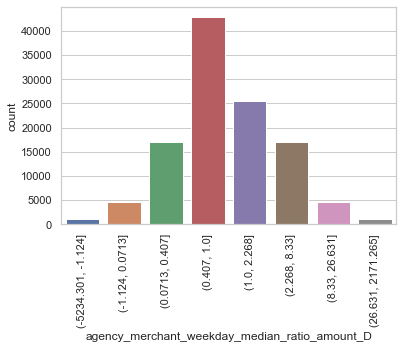

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_weekday_median_ratio_amount_D", data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [21]:
df6[df6['agency_merchant_weekday_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Median_amount,agency_merchant_weekday_median_ratio_amount,agency_merchant_weekday_median_ratio_amount_D
4,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,COKE INV bo,973.12,GRT PLAINS COCA COLA,2014-04-24,2014-04-28,NON-DURABLE GOODS NOT ELSEWHERE CLASSIFIED,2014,4,17,Thursday,124.200,7.835105,"(2.268, 8.33]"
10,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Hunt,C,Acer H236HL bid 23-Inch Wi PCE,330.96,AMAZON MKTPLACE PMTS,2014-04-25,2014-04-28,BOOK STORES,2014,4,17,Friday,44.365,7.459935,"(2.268, 8.33]"
15,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Ishmael,S,GENERAL PURCHASE,1292.11,www.wiley.com,2014-04-25,2014-04-28,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2014,4,17,Friday,133.360,9.688887,"(8.33, 26.631]"
17,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Jacob,J,FIXED-HT WORKBENCH LEG W/E EA,523.17,MCMASTER-CARR,2014-04-24,2014-04-28,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2014,4,17,Thursday,125.910,4.155111,"(2.268, 8.33]"
19,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Jacobs,D,GENERAL PURCHASE,1342.00,WTC TA INSTRUMENTS,2014-04-25,2014-04-28,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2014,4,17,Friday,263.860,5.086030,"(2.268, 8.33]"


### Feature 7: The total number of transactions with same vendor in past 30 days<a class="anchor" id="37"></a>

#### My thought process:
- The total number of transactions with same vendor in past 30 days is a good feature since cardholders who share the vendor and merchant category are more likely to similar level of purchase. The differences in same vendor and merchant category are the product brands and quantity(Category is stick with vendor). It further narrow down the scope in latest 30 days which is enough to indicate the trend. If the ratio to average amount by vendor in past 30 days of cardholders way above the average, we should check if it is anomolies.

In [27]:
# create a df subset within past 30 days
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(days=30)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
377724,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,5.20,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377725,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,20.95,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377726,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,36.75,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377727,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,C,AVERY ERASABLELABELS 7/8X2 EA|DURACELL COPPERT...,169.76,STAPLES 00105288,2014-06-16,2014-06-18,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2014,6,25,Monday
377728,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,GENERAL PURCHASE,250.00,NEO AUTO GLASS,2014-06-16,2014-06-18,AUTOMOTIVE REPAIR SHOPS (NON-DEALER),2014,6,25,Monday


In [28]:
# create number of transaction group by vendor
stat_by_ven = df_sub.groupby(['Vendor'])['Vendor'].count()
type(stat_by_ven)
stat_by_ven = pd.DataFrame(stat_by_ven)
stat_by_ven.columns = ['vendor_count_trans_num']
stat_by_ven

,vendor_count_trans_num
Vendor,
#17 VS,1
#18 VS,5
003 CENTURYLINK MY ACCOUN,2
004 CENTURYLINK IVR,1
045 OBI 086,4
...,...
pss_2025 INV 98976892,1
pss_2025 INV MULTIPLE,4
salary.com 16966017,1


In [29]:
# add the new feature transaction number to the dataset 
df7 = pd.merge(df_sub, stat_by_ven, how='left', on=['Vendor'])
# Feature 7: ratio of amount spending and number of transactions by vendor
df7
df7['vendor_count_trans_num'].describe()

count    35302.000000
mean       138.705286
std        284.160006
min          1.000000
25%          2.000000
50%         10.000000
75%         97.000000
max       1078.000000
Name: vendor_count_trans_num, dtype: float64

In [30]:
# cut by percentile for plotting
var = 'vendor_count_trans_num'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile,duplicates='drop')
df7[['vendor_count_trans_num_D']]

,vendor_count_trans_num_D
0,"(10.0, 144.0]"
1,"(10.0, 144.0]"
2,"(10.0, 144.0]"
3,"(144.0, 915.0]"
4,"(0.999, 10.0]"
...,...
35297,"(0.999, 10.0]"
35298,"(0.999, 10.0]"
35299,"(10.0, 144.0]"
35300,"(0.999, 10.0]"


[Text(0, 0, '(0.999, 10.0]'),
 Text(1, 0, '(10.0, 144.0]'),
 Text(2, 0, '(144.0, 915.0]'),
 Text(3, 0, '(915.0, 1078.0]')]

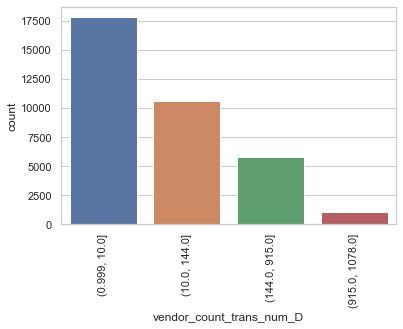

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_count_trans_num_D", data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [38]:
df7[df7['vendor_count_trans_num']>280].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,vendor_count_trans_num,vendor_count_trans_num_D
27,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Si,A,Dell 469-3925 OptiPlex Des PCE,1071.89,AMAZON MKTPLACE PMTS,2014-06-16,2014-06-17,BOOK STORES,2014,6,25,Monday,1078,"(915.0, 1078.0]"
34,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Song,H,LAMP HALO USHIO JC6V-30WG4 EA,45.75,VWR INTERNATIONAL INC,2014-06-17,2014-06-17,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2014,6,25,Tuesday,386,"(144.0, 915.0]"
40,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Sundstrom,K,2 CU FT 100% AROMATIC CEDA EA|TRIMACO PAINTERS...,302.27,LOWES #00241,2014-06-16,2014-06-17,HOME SUPPLY WAREHOUSE STORES,2014,6,25,Monday,416,"(144.0, 915.0]"
43,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Szlichta,J,WP (FOR WHED20) FILTER PAC EA,45.00,LOWES #00241,2014-06-16,2014-06-17,HOME SUPPLY WAREHOUSE STORES,2014,6,25,Monday,416,"(144.0, 915.0]"
44,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Talley,B,HM 1-CT 5/8-IN ZINC HEX NU EA|HM 1-CT 5/8-IN ZINC,36.00,LOWES #00241,2014-06-16,2014-06-17,HOME SUPPLY WAREHOUSE STORES,2014,6,25,Monday,416,"(144.0, 915.0]"


### Feature 8: Total number of transactions on the same day in past 30 days<a class="anchor" id="38"></a>

#### My thought process:
- The total number of transactions with same vendor in past 30 days is a good feature since cardholders who share the vendor and merchant category are more likely to similar level of purchase. The differences in same vendor and merchant category are the product brands and quantity(Category is stick with vendor). It further narrow down the scope in latest 30 days which is enough to indicate the trend. The same day transaction can take holiday effect into account. If total number of transactions on the same day in past 30 days of cardholders way above the average, we should check if it is anomolies.

In [168]:
# create a df subset within past 30 days
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(days=30)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
377724,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,5.20,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377725,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,20.95,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377726,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,36.75,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377727,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,C,AVERY ERASABLELABELS 7/8X2 EA|DURACELL COPPERT...,169.76,STAPLES 00105288,2014-06-16,2014-06-18,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2014,6,25,Monday
377728,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,GENERAL PURCHASE,250.00,NEO AUTO GLASS,2014-06-16,2014-06-18,AUTOMOTIVE REPAIR SHOPS (NON-DEALER),2014,6,25,Monday


In [169]:
# create number of transaction group by vendor and transaction date
stat_by_ven = df_sub.groupby(['Vendor', 'Transaction_Date'])['Transaction_Date'].count()
type(stat_by_ven)
stat_by_ven = pd.DataFrame(stat_by_ven)
stat_by_ven.columns = ['vendor_count_trans_num']
stat_by_ven

vendor_count_trans_num
Vendor                    Transaction_Date                        
#17 VS                    2014-06-18                             1
#18 VS                    2014-06-16                             3
                          2014-06-18                             1
                          2014-06-28                             1
003 CENTURYLINK MY ACCOUN 2014-06-03                             1
...                                                            ...
pss_2025 INV MULTIPLE     2014-06-20                             1
                          2014-06-24                             2
salary.com   16966017     2014-06-11                             1
wmill.com ResponseOmatic  2014-06-20                             1
www.wff2014korea.org/     2014-06-17                             1

[20396 rows x 1 columns]

In [170]:
# add the new feature average number of transaction to the dataset 
df8 = pd.merge(df_sub, stat_by_ven, how='left', on=['Vendor', 'Transaction_Date']) 
# Feature 8: ratio of amount spending and number of transactions by vendor
# df8
# df8['vendor_avg_ratio_amount'] = np.where(df8['Trans_num']==0, 0, df8['Amount_by_vendor'] / df8['Trans_num'])
df8['vendor_count_trans_num'].describe()

count    35302.000000
mean         8.886862
std         18.393489
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max        161.000000
Name: vendor_count_trans_num, dtype: float64

In [171]:
# cut by percentile for plotting
var = 'vendor_count_trans_num'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile,duplicates="drop")
df8[['vendor_count_trans_num_D']]

,vendor_count_trans_num_D
0,"(2.0, 9.0]"
1,"(2.0, 9.0]"
2,"(2.0, 9.0]"
3,"(2.0, 9.0]"
4,"(0.999, 2.0]"
...,...
35297,"(0.999, 2.0]"
35298,"(0.999, 2.0]"
35299,"(0.999, 2.0]"
35300,"(0.999, 2.0]"


[Text(0, 0, '(0.999, 2.0]'),
 Text(1, 0, '(2.0, 9.0]'),
 Text(2, 0, '(9.0, 48.0]'),
 Text(3, 0, '(48.0, 98.0]'),
 Text(4, 0, '(98.0, 161.0]')]

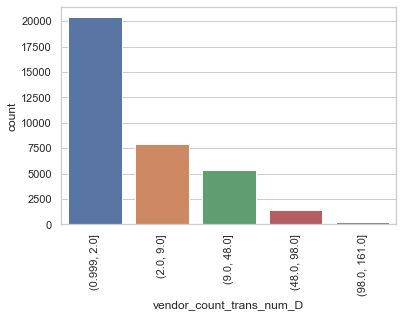

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_count_trans_num_D", data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [58]:
df7[df7['vendor_count_trans_num']>16].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,vendor_count_trans_num,vendor_count_trans_num_D
0,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,5.20,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday,58,"(10.0, 144.0]"
1,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,20.95,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday,58,"(10.0, 144.0]"
2,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,36.75,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday,58,"(10.0, 144.0]"
3,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,C,AVERY ERASABLELABELS 7/8X2 EA|DURACELL COPPERT...,169.76,STAPLES 00105288,2014-06-16,2014-06-18,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2014,6,25,Monday,170,"(144.0, 915.0]"
5,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,DeBow,P,GENERAL PURCHASE,152.60,WM SUPERCENTER #137,2014-06-17,2014-06-18,"GROCERY STORES,AND SUPERMARKETS",2014,6,25,Tuesday,97,"(10.0, 144.0]"


### Feature 9: The ratio to the average amount in weeks<a class="anchor" id="39"></a>

#### My thought process:
- The ratio to the average amount in weeks is a good feature since it further narrow down the scope to weeks which can take specific holiday, like Christmas, into account. If the ratio to average amount by vendor in weeks of cardholders way above the average, we should check if it is anomolies.

In [59]:
# create average spending group by agency, merchant category, and week number
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Week_Number'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']

In [60]:
# add the new feature average spending to the dataset 
df9 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Week_Number'])
# Feature 9: ratio of amount spending and avergae spending by merchant category 
df9['agency_merchant_week_avg_ratio_amount'] = np.where(df9['AVG_amount']==0,0, df9['Amount'] / df9['AVG_amount'])
df9['agency_merchant_week_avg_ratio_amount'].describe()

count    4.424580e+05
mean     1.002587e+00
std      3.200676e+15
min     -6.078171e+17
25%      2.483801e-01
50%      7.446154e-01
75%      1.133222e+00
max      6.078171e+17
Name: agency_merchant_week_avg_ratio_amount, dtype: float64

In [61]:
# cut by percentile for plotting
var = 'agency_merchant_week_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var],percentile)
df9[['agency_merchant_week_avg_ratio_amount_D']]

,agency_merchant_week_avg_ratio_amount_D
0,"(1.351, 3.23]"
1,"(1.351, 3.23]"
2,"(0.184, 0.745]"
3,"(1.351, 3.23]"
4,"(0.184, 0.745]"
...,...
442453,"(0.745, 1.351]"
442454,"(1.351, 3.23]"
442455,"(0.029, 0.184]"
442456,"(3.23, 7.324]"


[Text(0, 0, '(-6.078170647089906e+17, -0.847]'),
 Text(1, 0, '(-0.847, 0.029]'),
 Text(2, 0, '(0.029, 0.184]'),
 Text(3, 0, '(0.184, 0.745]'),
 Text(4, 0, '(0.745, 1.351]'),
 Text(5, 0, '(1.351, 3.23]'),
 Text(6, 0, '(3.23, 7.324]'),
 Text(7, 0, '(7.324, 6.078170647089906e+17]')]

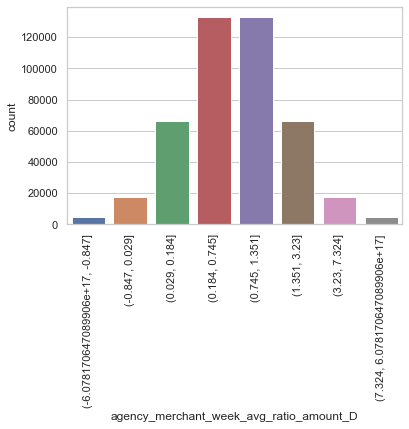

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_week_avg_ratio_amount_D", data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [63]:
df9[df9['agency_merchant_week_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_week_avg_ratio_amount,agency_merchant_week_avg_ratio_amount_D
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,46.219348,2.085490,"(1.351, 3.23]"
5,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,GENERAL PURCHASE,394.28,KYOCERA DOCUMENT SOLUTION,2013-07-29,2013-07-31,"OFFICE, PHOTOGRAPHIC, PHOTOCOPY, AND MICROFILM...",2013,7,31,Monday,154.774444,2.547449,"(1.351, 3.23]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,149.247241,2.981630,"(1.351, 3.23]"
16,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,165.371290,14.663972,"(7.324, 6.078170647089906e+17]"
17,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mohiuddin,I,GENERAL PURCHASE,2425.00,WESTERN EQUIPMENT ALVA,2013-07-29,2013-07-31,HARDWARE STORES,2013,7,31,Monday,165.371290,14.663972,"(7.324, 6.078170647089906e+17]"


### Feature 10: The ratio to average amount per day<a class="anchor" id="310"></a>

#### My thought process:
- The ratio to average amount per day is a good feature since cardholders who share the agency name and merchant category are more likely to similar level of purchase in month. Other than agency name and merchant category, month is also significant because people might spend more or less during certain months, for exmpale, cardholders from university might spend more during summer or winter vacation. If the ratio to average amount per day of cardholders in month way above the average, we should check if it is anomolies.

In [68]:
# create average spending group by agency, merchant category, and week number
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Transaction_Date'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

AVG_amount
Agency_Name                     Merchant_Category                          Transaction_Date            
ARDMORE HIGHER EDUCATION CENTER BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED 2013-11-08            115.12
                                CATALOG MERCHANTS                          2013-07-12           -606.42
                                                                           2013-07-25           -669.08
                                                                           2013-08-02            669.08
                                                                           2013-09-05           -334.54
...                                                                                                 ...
`DEPARTMENT OF EDUCATION        UNITED AIRLINES                            2013-12-19            197.80
                                                                           2013-12-26            272.80
                                WYNDHAM HOTELS                             2013-12-05             87.00
                                                                           2013-12-17            304.98
                                                                           2013-12-31              0.00

[164355 rows x 1 columns]

In [69]:
# add the new feature average spending to the dataset 
df10 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Transaction_Date'])
# Feature 10: ratio of amount spending and avergae spending per day over 30 days by merchant category 
df10['agency_merchant_day_avg_ratio_amount'] = np.where(df10['AVG_amount']==0, 0, df10['Amount'] / df10['AVG_amount'])
df10['agency_merchant_day_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.908116e-01
std      3.099853e+15
min     -5.875565e+17
25%      3.984064e-01
50%      1.000000e+00
75%      1.086957e+00
max      5.875565e+17
Name: agency_merchant_day_avg_ratio_amount, dtype: float64

In [72]:
# cut by percentile for plotting
var = 'agency_merchant_day_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var],percentile)
df10[['agency_merchant_day_avg_ratio_amount_D']]

,agency_merchant_day_avg_ratio_amount_D
0,"(1.293, 2.76]"
1,"(1.0, 1.293]"
2,"(1.0, 1.293]"
3,"(1.293, 2.76]"
4,"(0.0454, 0.291]"
...,...
442453,"(0.291, 1.0]"
442454,"(1.293, 2.76]"
442455,"(0.291, 1.0]"
442456,"(1.293, 2.76]"


[Text(0, 0, '(-5.875564958853576e+17, -0.838]'),
 Text(1, 0, '(-0.838, 0.0454]'),
 Text(2, 0, '(0.0454, 0.291]'),
 Text(3, 0, '(0.291, 1.0]'),
 Text(4, 0, '(1.0, 1.293]'),
 Text(5, 0, '(1.293, 2.76]'),
 Text(6, 0, '(2.76, 5.652]'),
 Text(7, 0, '(5.652, 5.875564958853576e+17]')]

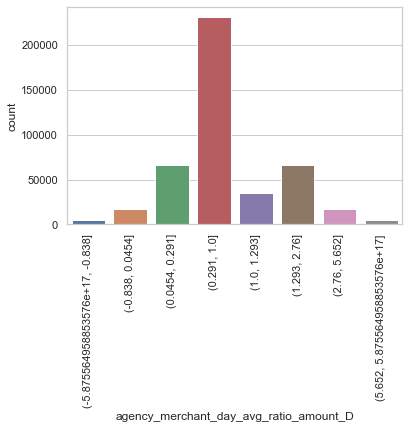

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_day_avg_ratio_amount_D", data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [74]:
df10[df10['agency_merchant_day_avg_ratio_amount']>20].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,agency_merchant_day_avg_ratio_amount,agency_merchant_day_avg_ratio_amount_D
356,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Ivey,D,NEC P552 55 PCB,-2474.99,CDW GOVERNMENT,2013-07-26,2013-07-29,CATALOG MERCHANTS,2013,7,30,Friday,-77.378889,31.985339,"(5.652, 5.875564958853576e+17]"
731,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Spears,J,Merchandise General EA,558.94,BURK OIL CO INC,2013-07-26,2013-07-29,SERVICE STATIONS (WITH OR WITHOUT ANCILLARY SE...,2013,7,30,Friday,14.430000,38.734581,"(5.652, 5.875564958853576e+17]"
2020,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Danley,D,Logitech R800 Professional PCE|My Passport 1 T...,157.26,SYX TIGERDIRECT.COM,2013-07-02,2013-07-03,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",2013,7,27,Tuesday,3.880000,40.530928,"(5.652, 5.875564958853576e+17]"
2660,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,-120.00,JEKYLL ISLAND CLUB HOTEL,2013-07-02,2013-07-03,"LODGING--HOTELS,MOTELS,AND RESORTS",2013,7,27,Tuesday,-2.020000,59.405941,"(5.652, 5.875564958853576e+17]"
3870,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Aichele,C,GENERAL PURCHASE,-2825.80,PEGASUS GLASS,2013-06-27,2013-07-01,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,26,Thursday,-36.230769,77.994480,"(5.652, 5.875564958853576e+17]"


### Feature 11: The ratio to average amount by vendor in past 3 months<a class="anchor" id="311"></a>

#### My thought process:
- The ratio to average amount by vendor is a good feature since cardholders who share the vendor and merchant category are more likely to similar level of purchase. The differences in same vendor and merchant category are the product brands and quantity(Category is stick with vendor). If the ratio to average amount by vendor of cardholders way above the average, we should check if it is anomolies.

In [31]:
# create a df subset within past 30 days
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(months=3)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
377724,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,5.20,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377725,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,20.95,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377726,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,36.75,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377727,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,C,AVERY ERASABLELABELS 7/8X2 EA|DURACELL COPPERT...,169.76,STAPLES 00105288,2014-06-16,2014-06-18,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2014,6,25,Monday
377728,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,GENERAL PURCHASE,250.00,NEO AUTO GLASS,2014-06-16,2014-06-18,AUTOMOTIVE REPAIR SHOPS (NON-DEALER),2014,6,25,Monday


In [53]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Vendor', 'Merchant_Category'])['Amount'].mean()
type(stat_by_agency)
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

,,AVG_amount
Vendor,Merchant_Category,
#1 PARTY SUPPLIES,MISCELLANEOUS AND SPECIALTY RETAIL STORES,347.060000
#101 BLUE CORN,EATING PLACES AND RESTAURANTS,379.210000
#15 VS,BOOK STORES,58.435000
#17 VS,BOOK STORES,128.900000
#18 VS,BOOK STORES,137.872000
...,...,...
www.molport.com,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CLASSIFIED,205.000000
www.sublimevideo.net,COMPUTER SOFTWARE STORES,18.188333
www.testking.com,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,99.990000


In [55]:
# add the new feature average spending to the dataset 
df11 = pd.merge(df, stat_by_agency, how='left', on=['Vendor', 'Merchant_Category'])
# Feature 11: ratio of amount spending and avergae spending by vendor category 
df11['vendor_merchant_avg_ratio_amount'] = np.where(df11['AVG_amount']==0, 0, df11['Amount'] / df11['AVG_amount'])
df11['vendor_merchant_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.935590e-01
std      9.397680e+13
min     -1.804536e+16
25%      2.768610e-01
50%      7.933907e-01
75%      1.025641e+00
max      5.413608e+16
Name: vendor_merchant_avg_ratio_amount, dtype: float64

In [58]:
# cut by percentile for plotting
var = 'vendor_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df11[binned_var] = pd.qcut(df11[var],percentile)
df11[['vendor_merchant_avg_ratio_amount_D']]

,vendor_merchant_avg_ratio_amount_D
0,"(1.205, 2.964]"
1,"(1.205, 2.964]"
2,"(0.793, 1.205]"
3,"(1.205, 2.964]"
4,"(0.793, 1.205]"
...,...
442453,"(0.0339, 0.207]"
442454,"(1.205, 2.964]"
442455,"(0.207, 0.793]"
442456,"(6.977, 5.413608227076047e+16]"


[Text(0, 0, '(-1.8045360756920156e+16, -0.468]'),
 Text(1, 0, '(-0.468, 0.0339]'),
 Text(2, 0, '(0.0339, 0.207]'),
 Text(3, 0, '(0.207, 0.793]'),
 Text(4, 0, '(0.793, 1.205]'),
 Text(5, 0, '(1.205, 2.964]'),
 Text(6, 0, '(2.964, 6.977]'),
 Text(7, 0, '(6.977, 5.413608227076047e+16]')]

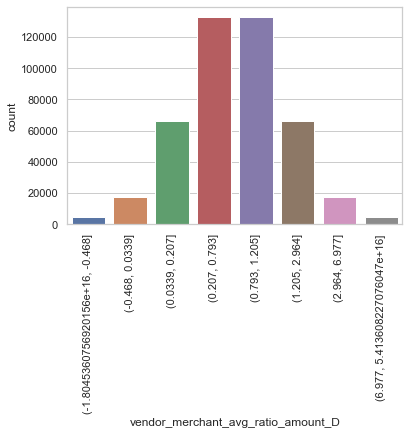

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_merchant_avg_ratio_amount_D", data=df11)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [64]:
df11[df11['vendor_merchant_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,vendor_merchant_avg_ratio_amount,vendor_merchant_avg_ratio_amount_D
8,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.6,UFIRST LAUNDRY SVCS,2013-07-30,2013-07-31,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",2013,7,31,Tuesday,56.362245,2.530062,"(1.205, 2.964]"
33,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Gerlt,T,GENERAL PURCHASE,3582.0,TELVENT,2013-07-26,2013-07-29,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Friday,839.142857,4.268641,"(2.964, 6.977]"
47,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DALCOUR,K,GENERAL PURCHASE,1312.2,NATURAL WATER COMPANY LLC,2013-07-24,2013-07-26,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,194.472727,6.747476,"(2.964, 6.977]"
53,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,DAVIS,M,GENERAL PURCHASE,590.4,UNITED REFRIG BR #82,2013-07-25,2013-07-26,"COMMERCIAL EQUIPMENT, NOT ELSEWHERE CLASSIFIED",2013,7,30,Thursday,261.495000,2.257787,"(1.205, 2.964]"
56,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Deaver,G,GENERAL PURCHASE,3835.0,COUNCIL FOR HIGHER EDUC A,2013-07-25,2013-07-26,MEMBERSHIP ORGANIZATIONS--NOT ELSEWHERE CLASSI...,2013,7,30,Thursday,1736.666667,2.208253,"(1.205, 2.964]"


### Feature 12: The ratio to median amount by vendor<a class="anchor" id="312"></a>

#### My thought process:
- The ratio to average amount by vendor is a good feature since cardholders who share the vendor and merchant category are more likely to similar level of purchase. The differences in same vendor are the product brands and quantity(Category is stick with vendor). Median is also crucial because average can be highly influenced by a small portion of extreme high or low value. If the ratio to median amount by vendor of cardholders way above the average, we should check if it is anomolies.

In [77]:
# create a df subset within past 30 days
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(months=3)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
266197,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Kindred,A,GENERAL PURCHASE,-0.36,FACEBK PGWZW5ASF2,2014-03-31,2014-03-31,ADVERTISING SERVICES,2014,3,14,Monday
267230,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Chang,Y,Dell D5000 Wireless Dock PCE,215.99,DMI DELL HIGHER EDUC,2014-03-31,2014-03-31,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",2014,3,14,Monday
268533,2014-03-01,1000,OKLAHOMA STATE UNIVERSITY,Perez,S,Once Upon a Time in the We PCE|The Bridges of ...,51.28,AMAZON MKTPLACE PMTS,2014-03-31,2014-03-31,BOOK STORES,2014,3,14,Monday
274102,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,GENERAL PURCHASE,39.10,EARTHGRAINS A/R,2014-04-25,2014-04-28,MISCELLANEOUS GENERAL MERCHANDISE,2014,4,17,Friday
274103,2014-04-01,1000,OKLAHOMA STATE UNIVERSITY,Howey,D,COKE INV bo,973.12,GRT PLAINS COCA COLA,2014-04-24,2014-04-28,NON-DURABLE GOODS NOT ELSEWHERE CLASSIFIED,2014,4,17,Thursday


In [78]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Vendor'])['Amount'].median()
type(stat_by_agency)
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
stat_by_agency

,,AVG_amount
Vendor,Merchant_Category,
#1 PARTY SUPPLIES,MISCELLANEOUS AND SPECIALTY RETAIL STORES,347.060
#101 BLUE CORN,EATING PLACES AND RESTAURANTS,379.210
#15 VS,BOOK STORES,58.435
#17 VS,BOOK STORES,128.900
#18 VS,BOOK STORES,191.840
...,...,...
www.molport.com,CHEMICALS AND ALLIED PRODUCTS NOT ELSEWHERE CLASSIFIED,205.000
www.sublimevideo.net,COMPUTER SOFTWARE STORES,19.900
www.testking.com,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,99.990


In [79]:
# add the new feature average spending to the dataset 
df12 = pd.merge(df, stat_by_agency, how='left', on=['Vendor', 'Merchant_Category'])
# Feature 11: ratio of amount spending and avergae spending by vendor category 
df12['vendor_merchant_median_ratio_amount'] = np.where(df11['AVG_amount']==0, 0, df11['Amount'] / df11['AVG_amount'])
df12['vendor_merchant_median_ratio_amount'].describe()

count    442458.000000
mean          2.034527
std          21.311270
min        -663.000000
25%           0.593933
50%           1.000000
75%           1.632070
max       13119.000000
Name: vendor_merchant_median_ratio_amount, dtype: float64

In [80]:
# cut by percentile for plotting
var = 'vendor_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut(df12[var],percentile)
df12[['vendor_merchant_median_ratio_amount_D']]

,vendor_merchant_median_ratio_amount_D
0,"(1.0, 2.009]"
1,"(2.009, 6.647]"
2,"(-663.001, -0.944]"
3,"(2.009, 6.647]"
4,"(1.0, 2.009]"
...,...
442453,"(0.0846, 0.462]"
442454,"(2.009, 6.647]"
442455,"(1.0, 2.009]"
442456,"(19.471, 13119.0]"


[Text(0, 0, '(-663.001, -0.944]'),
 Text(1, 0, '(-0.944, 0.0846]'),
 Text(2, 0, '(0.0846, 0.462]'),
 Text(3, 0, '(0.462, 1.0]'),
 Text(4, 0, '(1.0, 2.009]'),
 Text(5, 0, '(2.009, 6.647]'),
 Text(6, 0, '(6.647, 19.471]'),
 Text(7, 0, '(19.471, 13119.0]')]

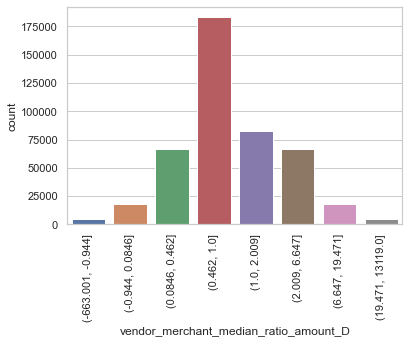

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_merchant_median_ratio_amount_D", data=df12)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [82]:
df12[df12['vendor_merchant_median_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,AVG_amount,vendor_merchant_median_ratio_amount,vendor_merchant_median_ratio_amount_D
1,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,2013,7,31,Tuesday,174.000,2.120460,"(2.009, 6.647]"
3,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS",2013,7,31,Tuesday,35.565,2.710249,"(2.009, 6.647]"
8,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McCarthy,D,GENERAL PURCHASE,142.60,UFIRST LAUNDRY SVCS,2013-07-30,2013-07-31,"MENS, WOMENS AND CHILDRENS UNIFORMS AND COMMER...",2013,7,31,Tuesday,54.720,2.605994,"(2.009, 6.647]"
11,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,McKee,P,GENERAL PURCHASE,127.80,DEARINGER PRINTING & TROP,2013-07-30,2013-07-31,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2013,7,31,Tuesday,63.500,2.012598,"(2.009, 6.647]"
14,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Meints,K,GENERAL PURCHASE,445.00,OK DEPT OF VO-TECH ED,2013-07-30,2013-07-31,GOVERNMENT SERVICES--NOT ELSEWHERE CLASSIFIED,2013,7,31,Tuesday,120.620,3.689272,"(2.009, 6.647]"


### Feature 13: The average amount spent on the same weekday by vendor in past 30 days<a class="anchor" id="313"></a>

#### My thought process:
- The average amount by vendor in past 30 days is a good feature since it indicates the average purchase level of cardholders in stores in each weekday. The differences in same vendor are the product brands and quantity(Category is stick with vendor). If the average amount spent on the same weekday by vendor in past 30 days of cardholders way above the average, we should check if it is anomolies.

In [117]:
# create a df subset within past 30 days
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(days=30)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
377724,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,5.20,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377725,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,20.95,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377726,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,36.75,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377727,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,C,AVERY ERASABLELABELS 7/8X2 EA|DURACELL COPPERT...,169.76,STAPLES 00105288,2014-06-16,2014-06-18,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2014,6,25,Monday
377728,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,GENERAL PURCHASE,250.00,NEO AUTO GLASS,2014-06-16,2014-06-18,AUTOMOTIVE REPAIR SHOPS (NON-DEALER),2014,6,25,Monday


In [122]:
# create number of transaction group by vendor
stat_by_agency = df_sub.groupby(['Vendor', 'Day_of_Week'])['Amount'].mean()
type(stat_by_agency)
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['vendor_wkday_avg']
stat_by_agency.head()

vendor_wkday_avg
Vendor                    Day_of_Week                  
#17 VS                    Wednesday          128.900000
#18 VS                    Monday             209.473333
                          Saturday            33.970000
                          Wednesday           26.970000
003 CENTURYLINK MY ACCOUN Monday              30.090000

In [123]:
# add the new feature transaction number to the dataset 
df13 = pd.merge(df_sub, stat_by_agency, how='left', on=['Vendor', 'Day_of_Week'])
# Feature 7: ratio of amount spending and number of transactions by vendor
df13['vendor_wkday_avg'].describe()

count     35302.000000
mean        444.175744
std        1637.338870
min       -4987.040000
25%          73.538810
50%         167.510000
75%         422.560249
max      132790.140000
Name: vendor_wkday_avg, dtype: float64

In [124]:
# cut by percentile for plotting
var = 'vendor_wkday_avg'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df13[binned_var] = pd.qcut(df13[var],percentile)
df13[['vendor_wkday_avg_D']]

,vendor_wkday_avg_D
0,"(12.43, 53.717]"
1,"(12.43, 53.717]"
2,"(12.43, 53.717]"
3,"(53.717, 167.51]"
4,"(167.51, 513.664]"
...,...
35297,"(513.664, 1560.378]"
35298,"(1560.378, 4346.81]"
35299,"(53.717, 167.51]"
35300,"(4346.81, 132790.14]"


[Text(0, 0, '(-4987.041, -35.609]'),
 Text(1, 0, '(-35.609, 12.43]'),
 Text(2, 0, '(12.43, 53.717]'),
 Text(3, 0, '(53.717, 167.51]'),
 Text(4, 0, '(167.51, 513.664]'),
 Text(5, 0, '(513.664, 1560.378]'),
 Text(6, 0, '(1560.378, 4346.81]'),
 Text(7, 0, '(4346.81, 132790.14]')]

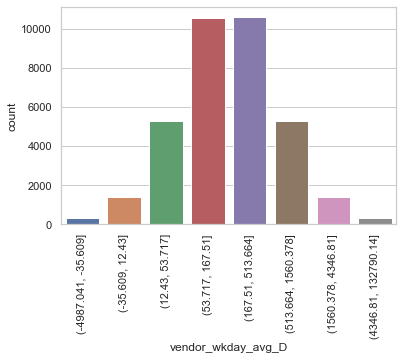

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_wkday_avg_D", data=df13)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [108]:
df13[df13['vendor_wkday_avg']>900].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,vendor_wkday_avg,vendor_wkday_avg_D
24,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Schmidt,D,GENERAL PURCHASE,1763.21,JESTER COMPANY,2014-06-16,2014-06-17,MISCELLANEOUS PUBLISHING AND PRINTING SERVICES,2014,6,25,Monday,1763.21,"(1560.378, 4346.81]"
30,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Smith,B,DBI ROLLGLISS S/N 98200012 EA|DBI ROLLGLISS S/...,2658.95,NSC NORTHERN SAFETY CO,2014-06-17,2014-06-17,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2014,6,25,Tuesday,2658.95,"(1560.378, 4346.81]"
39,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Storm,D,DELL B1260DN Mono Laser Pr PCE,119.00,DMI DELL HIGHER EDUC,2014-06-17,2014-06-17,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",2014,6,25,Tuesday,1967.61,"(1560.378, 4346.81]"
56,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Tornakian,M,GENERAL PURCHASE,656.00,EEI FILTER DIVISION,2014-06-16,2014-06-17,HARDWARE EQUIPMENT AND SUPPLIES,2014,6,25,Monday,1109.41,"(513.664, 1560.378]"
87,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Burgess,J,GENERAL PURCHASE,1392.96,PERSONALIZED PAPER STORE,2014-06-18,2014-06-19,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2014,6,25,Wednesday,1392.96,"(513.664, 1560.378]"


### Feature 14: The average amount spent in months by vendor in past 30 days<a class="anchor" id="314"></a>

#### My thought process:
- he average amount spent in months by vendor in past 30 days is a good feature since it indicates the average purchase level of cardholders in stores each month. The differences in same vendor are the product brands and quantity(Category is stick with vendor). If the average amount spent in months by vendor in past 30 days of cardholders way above the average, we should check if it is anomolies.

In [ ]:
# create a df subset within past 30 days
from datetime import datetime
from dateutil.relativedelta import relativedelta
most_recent_date = df['Transaction_Date'].max()
one_month_ago = most_recent_date -  relativedelta(days=30)
df_sub = df[(df['Transaction_Date'] > one_month_ago) & (df['Transaction_Date'] <= most_recent_date)]
df_sub.head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week
377724,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,5.20,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377725,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,20.95,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377726,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Curtis-Passmore,T,GENERAL PURCHASE,36.75,QUALITY WATER SERVICES,2014-06-17,2014-06-18,MISCELLANEOUS AND SPECIALTY RETAIL STORES,2014,6,25,Tuesday
377727,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,C,AVERY ERASABLELABELS 7/8X2 EA|DURACELL COPPERT...,169.76,STAPLES 00105288,2014-06-16,2014-06-18,"STATIONERY,OFFICE AND SCHOOL SUPPLY STORES",2014,6,25,Monday
377728,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,GENERAL PURCHASE,250.00,NEO AUTO GLASS,2014-06-16,2014-06-18,AUTOMOTIVE REPAIR SHOPS (NON-DEALER),2014,6,25,Monday


In [147]:
# create number of transaction group by vendor
stat_by_vendor = df_sub.groupby(['Vendor','Month'])['Amount'].mean()
type(stat_by_vendor)
stat_by_vendor = pd.DataFrame(stat_by_vendor)
stat_by_vendor.columns = ['vendor_month_avg']
stat_by_vendor

,,vendor_month_avg
Vendor,Month,
#17 VS,6,128.9000
#18 VS,6,137.8720
003 CENTURYLINK MY ACCOUN,6,73.8150
004 CENTURYLINK IVR,6,178.2900
045 OBI 086,6,84.0975
...,...,...
pss_2025 INV 98976892,6,97.5400
pss_2025 INV MULTIPLE,6,458.1725
salary.com 16966017,6,2949.0000


In [148]:
# add the new feature transaction number to the dataset 
df14 = pd.merge(df_sub, stat_by_vendor, how='left', on=['Vendor', 'Month'])
# Feature 14: ratio of amount spending and number of transactions by vendor
df14['vendor_month_avg'].describe()

count    35302.000000
mean       444.175744
std       1307.831487
min      -4987.040000
25%         88.830000
50%        186.522154
75%        454.402500
max      60347.380000
Name: vendor_month_avg, dtype: float64

In [150]:
# cut by percentile for plotting
var = 'vendor_month_avg'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df14[binned_var] = pd.qcut(df14[var],percentile,duplicates='drop')
df14[['vendor_month_avg_D']]

,vendor_month_avg_D
0,"(69.0, 186.522]"
1,"(69.0, 186.522]"
2,"(69.0, 186.522]"
3,"(69.0, 186.522]"
4,"(504.506, 1535.592]"
...,...
35297,"(1535.592, 4499.885]"
35298,"(1535.592, 4499.885]"
35299,"(69.0, 186.522]"
35300,"(4499.885, 60347.38]"


[Text(0, 0, '(-4987.041, 0.0]'),
 Text(1, 0, '(0.0, 17.365]'),
 Text(2, 0, '(17.365, 69.0]'),
 Text(3, 0, '(69.0, 186.522]'),
 Text(4, 0, '(186.522, 504.506]'),
 Text(5, 0, '(504.506, 1535.592]'),
 Text(6, 0, '(1535.592, 4499.885]'),
 Text(7, 0, '(4499.885, 60347.38]')]

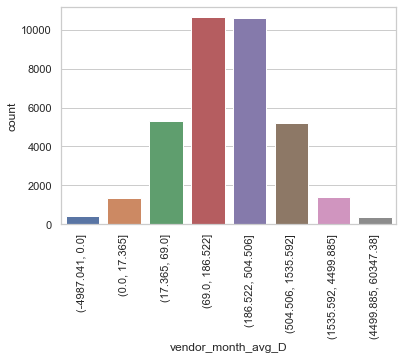

In [151]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_month_avg_D", data=df14)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [153]:
df14[df14['vendor_month_avg']>900].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,vendor_month_avg,vendor_month_avg_D
24,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Schmidt,D,GENERAL PURCHASE,1763.21,JESTER COMPANY,2014-06-16,2014-06-17,MISCELLANEOUS PUBLISHING AND PRINTING SERVICES,2014,6,25,Monday,1763.210000,"(1535.592, 4499.885]"
30,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Smith,B,DBI ROLLGLISS S/N 98200012 EA|DBI ROLLGLISS S/...,2658.95,NSC NORTHERN SAFETY CO,2014-06-17,2014-06-17,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,2014,6,25,Tuesday,1975.325000,"(1535.592, 4499.885]"
39,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Storm,D,DELL B1260DN Mono Laser Pr PCE,119.00,DMI DELL HIGHER EDUC,2014-06-17,2014-06-17,"COMPUTERS, COMPUTER PERIPHERAL EQUIPMENT, SOFT...",2014,6,25,Tuesday,1137.614478,"(504.506, 1535.592]"
56,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Tornakian,M,GENERAL PURCHASE,656.00,EEI FILTER DIVISION,2014-06-16,2014-06-17,HARDWARE EQUIPMENT AND SUPPLIES,2014,6,25,Monday,1010.213636,"(504.506, 1535.592]"
87,2014-06-01,1000,OKLAHOMA STATE UNIVERSITY,Burgess,J,GENERAL PURCHASE,1392.96,PERSONALIZED PAPER STORE,2014-06-18,2014-06-19,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...",2014,6,25,Wednesday,1143.865000,"(504.506, 1535.592]"


### Feature 15: The ratio to average amount in each day by vendor<a class="anchor" id="315"></a>

#### My thought process:
- The ratio to average amount by vendor is a good feature since it indicates the ratio to average purchase level of cardholders in stores in each day, which is more specific to detect anomoalies. The differences in same vendor are the product brands and quantity(Category is stick with vendor). If the ratio to average amount in each day by vendor of cardholders way above the average, we should check if it is anomolies.

In [162]:
# create number of transaction group by vendor
stat_by_ven = df.groupby(['Vendor', 'Transaction_Date'])['Amount'].mean()
type(stat_by_ven)
stat_by_ven = pd.DataFrame(stat_by_ven)
stat_by_ven.columns = ['Amount_by_vendor']
stat_by_ven

Amount_by_vendor
Vendor                Transaction_Date                  
#1 PARTY SUPPLIES     2014-02-17                  347.06
#101 BLUE CORN        2014-05-11                  379.21
#15 VS                2014-03-04                   51.92
                      2014-05-22                   64.95
#17 VS                2014-06-18                  128.90
...                                                  ...
www.testking.com      2013-10-08                   99.99
www.wff2014korea.org/ 2014-06-17                  250.00
www.wiley.com         2014-04-25                 1292.11
                      2014-05-13                 1087.81
                      2014-05-20                -1080.61

[256832 rows x 1 columns]

In [163]:
# add the new feature average spending to the dataset 
from functools import reduce
df15 = pd.merge(df, stat_by_ven, how='left', on=['Vendor', 'Transaction_Date']) 
# Feature 15: ratio of amount spending and number of transactions by vendor
df15
df15['vendor_avg_ratio_amount'] = np.where(df15['Amount_by_vendor']==0, 0, df15['Amount'] / df15['Amount_by_vendor'])
df15['vendor_avg_ratio_amount'].describe()

count    4.424580e+05
mean     9.969922e-01
std      1.089324e+14
min     -4.334257e+16
25%      7.104276e-01
50%      1.000000e+00
75%      1.000000e+00
max      4.398047e+16
Name: vendor_avg_ratio_amount, dtype: float64

In [165]:
# cut by percentile for plotting
var = 'vendor_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df15[binned_var] = pd.qcut(df15[var],percentile, duplicates="drop")
df15[['vendor_avg_ratio_amount_D']]

,vendor_avg_ratio_amount_D
0,"(0.501, 1.0]"
1,"(1.0, 2.199]"
2,"(0.501, 1.0]"
3,"(1.0, 2.199]"
4,"(1.0, 2.199]"
...,...
442453,"(0.501, 1.0]"
442454,"(0.501, 1.0]"
442455,"(1.0, 2.199]"
442456,"(0.501, 1.0]"


[Text(0, 0, '(-4.334257244506947e+16, -0.256]'),
 Text(1, 0, '(-0.256, 0.0831]'),
 Text(2, 0, '(0.0831, 0.501]'),
 Text(3, 0, '(0.501, 1.0]'),
 Text(4, 0, '(1.0, 2.199]'),
 Text(5, 0, '(2.199, 4.69]'),
 Text(6, 0, '(4.69, 4.398046511104e+16]')]

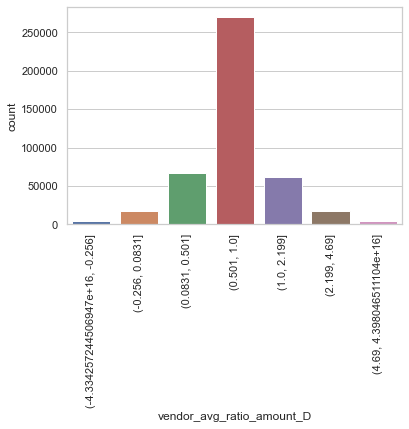

In [166]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="vendor_avg_ratio_amount_D", data=df15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [167]:
df15[df15['vendor_avg_ratio_amount']>2].head()

,Year_Month,Agency_Number,Agency_Name,Cardholder_Last_Name,Cardholder_First_Initial,Description,Amount,Vendor,Transaction_Date,Posted_Date,Merchant_Category,Year,Month,Week_Number,Day_of_Week,Amount_by_vendor,vendor_avg_ratio_amount,vendor_avg_ratio_amount_D
26,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Foye,S,GENERAL PURCHASE,178.00,"AFFYMETRIX, INC",2013-07-26,2013-07-29,DENTAL/LABORATORY/MEDICAL/OPHTHALMIC HOSP EQIP...,2013,7,30,Friday,74.000000,2.405405,"(2.199, 4.69]"
50,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Davis,G,Disposable GlovesNitrile EA|Ear Plugs32dBW/o C...,714.94,WW GRAINGER,2013-07-24,2013-07-26,INDUSTRIAL SUPPLIES NOT ELSEWHERE CLASSIFIED,2013,7,30,Wednesday,272.031364,2.628153,"(2.199, 4.69]"
58,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dillard,C,GENERAL PURCHASE,104.86,WAL-MART #0137,2013-07-25,2013-07-26,"GROCERY STORES,AND SUPERMARKETS",2013,7,30,Thursday,51.158182,2.049721,"(1.0, 2.199]"
59,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dipboye,K,GENERAL PURCHASE,545.40,ALLEGRA PRINT & IMAGING,2013-07-24,2013-07-26,QUICK-COPY AND REPRODUCTION SERVICES,2013,7,30,Wednesday,254.683333,2.141483,"(1.0, 2.199]"
67,2013-07-01,1000,OKLAHOMA STATE UNIVERSITY,Dukes,S,HP LaserJet Pro P1606dn Pr PCE,149.67,AMAZON MKTPLACE PMTS,2013-07-26,2013-07-26,BOOK STORES,2013,7,30,Friday,58.407761,2.562502,"(2.199, 4.69]"
